TODO: Commentare CODICE!, BackPropagation, Funzioni per la validazione, creata la rete neurale da utilizzare prima i datasets MONK e sul dataset per la CUP .

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

In [4]:
#Inizializzo i Pesi iniziali casualmente, l_dim array che continene la dimensione dei layer (include anche l'input layer e l'output layer)
#parametro seed per il random e eps per la regolarizzazione dei pesi
def init_wb(l_dim, seed=30,eps=1):
    np.random.seed(seed)
    wb = {}
    
    #L dimensione della rete
    L = len(l_dim)
    
    for l in range(1, L):
        #Inizializzo i pesi maniera randomica e in range ristretto
        wb['W'+str(l)] = np.random.randn(l_dim[l],l_dim[l-1]) * eps
        #Inizializzo i bias a zero
        wb['b'+str(l)] = np.zeros((l_dim[l], 1))
        
    return wb

In [5]:
#Test init_wb
l_dim=[6,3,2,1]
L=len(l_dim)
wb=init_wb(l_dim)
for l in range(1,L):
    print("Shape W"+str(l),wb["W"+str(l)].shape, "Shape b"+str(l),wb["W"+str(l)].shape,wb["W"+str(l)] )

Shape W1 (3, 6) Shape b1 (3, 6) [[-1.26405266  1.52790535 -0.97071094  0.47055962 -0.10069672  0.30379318]
 [-1.72596243  1.58509537  0.13429659 -1.10685547  1.57822555  0.10749794]
 [-0.76404783 -0.77518851  1.38384717  0.76038508 -0.28564551  0.53836748]]
Shape W2 (2, 3) Shape b2 (2, 3) [[-2.08389663  0.93778171 -0.005778  ]
 [-0.46747897 -0.4230153   1.06448209]]
Shape W3 (1, 2) Shape b3 (1, 2) [[-2.9033676   1.61689037]]


In [6]:
def linear_af(w,X,b):
    
    h = np.dot(w,X.T)+b
    
    return h

In [7]:
#Test linear activation function
np.random.seed(30)
w= np.random.randn(1,6)
X = np.random.randint(2, size=(2,6))
Y = np.random.randint(2, size=(2))
print(Y.shape,X.shape)
b = np.ones((1,1))
print("W",w,"X",X,"b",b,sep="\n")
h= linear_af(w,X,b)
print("H",h,sep="\n")


(2,) (2, 6)
W
[[-1.26405266  1.52790535 -0.97071094  0.47055962 -0.10069672  0.30379318]]
X
[[1 1 1 1 1 1]
 [1 1 1 0 0 0]]
b
[[1.]]
H
[[0.96679783 0.29314175]]


In [8]:
def perceptron_af(net,zero=False):
    x=np.array(np.sign(net))
    if zero:
        x=np.where(x<0,0,x)
    return x

[[1. 1.]]


Text(0, 0.5, 'Sign(X)')

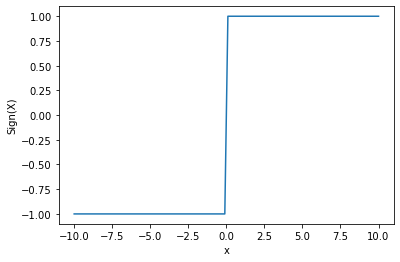

In [9]:
#test perceptron activation function
print(perceptron_af(h,zero=True))
x = np.linspace(-10, 10, 100)
z =np.sign(x)
plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sign(X)")
  

In [10]:
def sigmoid_af(net):
    sf= 1/(1 + np.exp(-net))
    return sf

[[0.72448078 0.57276511]]


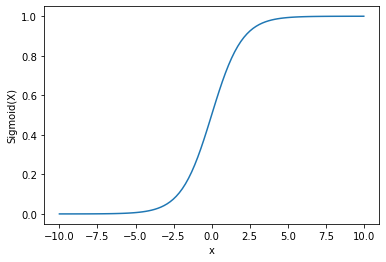

In [11]:
#test sigmoid activaton function
s=sigmoid_af(h)
print(s)
x = np.linspace(-10, 10, 100)
z = sigmoid_af(x)
plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
  
plt.show()

In [12]:
def mse(Y,Y_hat,reg=0, e_loss=None):
    l=Y.shape[0]
    loss=np.sum(np.square(Y - Y_hat)) + reg
    loss=loss*(1/l)
    #cancellando il due
    #cost=cost*(1/2l)
    if e_loss != None:
        e_loss.append(loss)
    return loss, e_loss

def gradient_mse(Y,h,x):
    dp = np.subtract(Y,h)
    p = Y.shape[0]
    gradient= -2 * np.dot(dp.T,x)
    gradient= gradient/p
    #cancellando il due
    #gradient= np.dot(dp,x)
    return gradient

In [13]:
def mse_logistic(Y,net,e_loss):
    sig=sigmoid_af(net)
    l=Y.shape[0]
    loss=np.sum(np.square(Y-sig))
    loss=loss*1/l
    if e_loss != None:
        e_loss.append(loss)
    return loss,e_loss

def gradient_mse_logistic(Y,net,x):
    sig=sigmoid_af(net)
    dp = np.subtract(Y,sig)*sigomid_derivative(net)
    p = Y.shape[0]
    gradient= -2 * np.dot(dp.T,x)
    gradient= gradient/p

    return gradient


In [14]:
def normal_equation(X,Y,pseudo=False):
    if pseudo:
        pinv=np.linalg.pinv(X)
        direct=pinv.dot(Y)
    else:
        direct=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    
    return direct
    

In [15]:
#test cost lms
np.random.seed(10)
w= np.random.randn(1,6)
X = np.random.randint(2, size=(2,6))
Y = np.random.randint(2, size=(2,))
b = np.zeros((1,1))
print("X",X,"Y",Y,"H",h,sep="\n")
h = linear_af(w,X,b)
print("Cost MSE= ", mse(Y,h)[0])
print("Gradient", gradient_mse(Y.T,h.T,X))
end=time.time()
direct=normal_equation(X,Y,True)
print("Direct",direct )
dh=linear_af(direct,X,b)
cost=mse(Y,dh)[0]
print("dh",dh,"Cost Direct", cost)



X
[[0 0 0 0 0 1]
 [0 0 1 1 0 0]]
Y
[1 0]
H
[[0.96679783 0.29314175]]
Cost MSE=  2.6864697481239848
Gradient [[-0.         -0.         -2.55378414 -2.55378414 -0.         -1.72008556]
 [-0.         -0.         -1.55378414 -1.55378414 -0.         -0.72008556]]
Direct [0. 0. 0. 0. 0. 1.]
dh [[1. 0.]] Cost Direct 0.0


In [16]:
def classification_loss(out, y):
    num_err=0
    index = 0
    if out.shape != y.shape:
        return -1
    for o in  out:
        if o != y[index]:
            num_err+=1
        index+=1
    return num_err

In [17]:
def gradient_descent(w,eta,gradient):
    dw= - gradient
    newW= w + (eta * dw)
    
    return newW

In [18]:
np.random.seed(10)
w= np.random.randn(1,6)
X = np.random.randint(2, size=(2,6))
Y = np.random.randint(2, size=(2,))
b = np.zeros((1,1))
h = linear_af(w,X,b)
print("Error Gradient: ", gradient_mse(Y.T,h.T,X))
cost=mse(Y,h)[0]
print("Cost: ",cost)
eta=0.01
descent= gradient_descent(w,eta,gradient_mse(Y.T,h.T,X))
gh=linear_af(descent,X,b)
cost=mse(Y,gh)[0]
print("After Cost: ",cost)
tihk=0.00001
reg= tihk * np.square(np.linalg.norm(w))
print("Penalty term: ",reg)
cost=mse(Y,dh,reg)[0]
print("Cost with penalty term: ",cost)
gradreg = 2*tihk*w
descent = gradient_descent(w,eta,gradient_mse(Y.T,h.T,X) - gradreg)
gh=linear_af(descent,X,b)
cost=mse(Y,gh,reg)[0]
print("After Cost with penalty term: ",cost)


Error Gradient:  [[-0.         -0.         -2.55378414 -2.55378414 -0.         -1.72008556]
 [-0.         -0.         -1.55378414 -1.55378414 -0.         -0.72008556]]
Cost:  2.6864697481239848
After Cost:  5.205282048486701
Penalty term:  5.577660588199804e-05
Cost with penalty term:  2.788830294099902e-05
After Cost with penalty term:  5.205311368887972


In [19]:
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


In [20]:
X, y = load_breast_cancer(return_X_y= True)

In [21]:
#X_dev, X_test, y_dev, y_test = train_test_split(X,y,test_size=100, stratify=y, shuffle=True, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X,y,test_size=100, stratify=y, shuffle=True, random_state=42)

X_dev.shape, X_test.shape

((469, 30), (100, 30))

In [22]:
np.random.seed(20)
w= np.random.randn(1,30)* 0.0001
b = np.zeros((1,1))
y_dev=y_dev.reshape(y_dev.shape[0],1)
l = y_dev.shape[0]
normalw = normal_equation(X_dev,y_dev).T
h=linear_af(normalw,X_dev,b)
out=perceptron_af(h,zero=True).T
err=classification_loss(out,y_dev)
print("Train set",err,(l-err)/y_dev.shape[0]*100,"%")

cost_history=[]
cost,cost_history = mse(y_dev,out,0,cost_history)


h=linear_af(normalw,X_test,b)
out=perceptron_af(h,zero=True).T

y_test=y_test.reshape(y_test.shape[0],1)

cost2,cost_history= mse(y_test,out,0,cost_history)
#print("W",normalw,"Out",h)
tl = y_test.shape[0]

terr=classification_loss(out,y_test)
print("TEST set",terr,(tl-terr)/y_test.shape[0]*100,"%")
print("Cost Train NormalEquation: ",cost,"Cost Test NormalEquation: ",cost2," History", cost_history)


Train set 119 74.6268656716418 %
TEST set 28 72.0 %
Cost Train NormalEquation:  0.2537313432835821 Cost Test NormalEquation:  0.28  History [0.2537313432835821, 0.28]


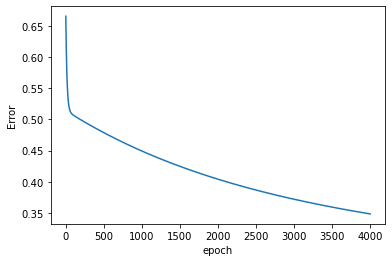

Train set 170 63.75266524520256 %
Costs:  0.3482999479240116
Cost Test:  0.37
TEST set 37 63.0 %


In [23]:
np.random.seed(20)
w= np.random.randn(1,30)*0.0001
b = np.zeros((1,1))
cost_history=[]
eta=0.00000001
lambdat=0.00000001
epoch=4000

y_dev=y_dev.reshape(y_dev.shape[0],1)
l = y_dev.shape[0]

for i in range (1,epoch):
    reg=lambdat * np.square(np.linalg.norm(w))
    h=linear_af(w,X_dev,b).T
    cost,cost_history = mse(y_dev, h,reg,cost_history)
    gradient = gradient_mse(y_dev, h, X_dev)
    gradreg = 2*lambdat*w
    w = gradient_descent(w,eta,gradient)-gradreg
    
plt.plot(range(1,epoch),cost_history)
plt.xlabel("epoch")
plt.ylabel("Error")
plt.show()

h=linear_af(w,X_dev,b)
out=perceptron_af(h,zero=True).T
err=classification_loss(out,y_dev)
print("Train set",err,(l-err)/y_dev.shape[0]*100,"%")

y_test = np.reshape(y_test,(y_test.shape[0],1))
tl = y_test.shape[0]
h=linear_af(w,X_test,b)
out=perceptron_af(h).T

cost2,cost_history=mse(y_test,out,0)
print("Costs: ",cost)
print("Cost Test: ",cost2)
terr=classification_loss(out,y_test)
print("TEST set",terr,(tl-terr)/y_test.shape[0]*100,"%")


In [24]:
def perceptron_learning(w,eta,d,x,epochs):
    #print("Shape d: ",d.shape," out: ",out.shape,"X: ",x.shape,"d-out: ",(np.subtract(d,out)))
    b = np.zeros((1,1))
    newW=w
    iter_miss=[]
    i=0
    miss=-1
    ok=0
    while miss!=0 and i!=epochs:
        miss=0
        ok=0
        for p, xp in enumerate(x):
            xp=np.reshape(xp,(1,xp.shape[0]))
            out = perceptron_step(newW,xp,b)
            dout=np.squeeze(d[p])-np.squeeze(out)
            if dout!=0:
                newW +=  eta * (dout * xp)
                miss+=1
                #print(miss,"out",out,"Dp",d[p],"Dout",dout)
        i+=1;
        iter_miss.append(miss)
        if i % 500 == 0:
            print(i)
    return newW,iter_miss,i

def perceptron_step(w,x,b):
    h=linear_af(w,x,b)
    return perceptron_af(h,zero=True).T
    

500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
Train test:  51 89.12579957356077 %


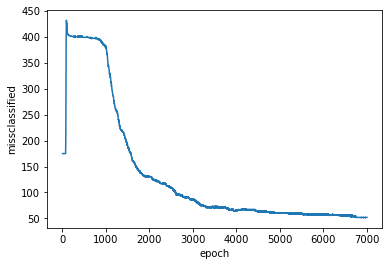

TEST set:  13 87.0 %


In [25]:
np.random.seed(10)
w= np.random.randn(1,30)*0.1
b = np.zeros((1,1))
eta=0.000000007

y_dev = np.reshape(y_dev,(y_dev.shape[0],1))
l = y_dev.shape[0]
epoch=7000
newW,miss,i= perceptron_learning(w,eta,y_dev,X_dev,epoch)
out=perceptron_step(newW,X_dev,b)
nerr=classification_loss(out,y_dev)
print("Train test: ",nerr,(l-nerr)/y_dev.shape[0]*100,"%")
plt.plot(range(1,epoch+1),miss)
plt.xlabel("epoch")
plt.ylabel("missclassified")
plt.show()
out=perceptron_step(newW,X_test,b)
y_test = np.reshape(y_test,(y_test.shape[0],1))
tl = y_test.shape[0]
terr=classification_loss(out,y_test)
print("TEST set: ",terr,(tl-terr)/y_test.shape[0]*100,"%")


In [26]:
def forward_propagation(X,w,b,f_activation):
    h=linear_af(w,X,b).T
    fwd_X = f_activation(h)
    cache=(x)
    return h,fwd_X,cache


In [27]:
l_dim=[30,15,7,1]
L=len(l_dim)
wb=init_wb(l_dim,30,0.01)
newX=X_dev
caches=[]
for l in range(1,L):
    print("INPUT: ",newX.T)
    print("Shape W"+str(l),wb["W"+str(l)].shape, "Shape b"+str(l),wb["b"+str(l)].shape,wb["W"+str(l)] )
    h,newX,cache= forward_propagation(newX,wb["W"+str(l)],wb["b"+str(l)],sigmoid_af)
    caches.append(cache)
    
print("OUTPUT: ",newX)
cost,cost_history = mse(y_dev, newX,0,cost_history)
print(cost)


INPUT:  [[9.504e+00 1.362e+01 7.691e+00 ... 1.546e+01 1.705e+01 1.495e+01]
 [1.244e+01 2.323e+01 2.544e+01 ... 2.395e+01 1.908e+01 1.877e+01]
 [6.034e+01 8.719e+01 4.834e+01 ... 1.038e+02 1.134e+02 9.784e+01]
 ...
 [6.227e-02 7.174e-02 5.000e-02 ... 2.163e-01 2.543e-01 8.405e-02]
 [2.450e-01 2.642e-01 2.790e-01 ... 3.013e-01 3.109e-01 2.852e-01]
 [7.773e-02 6.953e-02 1.066e-01 ... 1.067e-01 9.061e-02 9.218e-02]]
Shape W1 (15, 30) Shape b1 (15, 1) [[-1.26405266e-02  1.52790535e-02 -9.70710938e-03  4.70559616e-03
  -1.00696716e-03  3.03793185e-03 -1.72596243e-02  1.58509537e-02
   1.34296593e-03 -1.10685547e-02  1.57822555e-02  1.07497943e-03
  -7.64047827e-03 -7.75188509e-03  1.38384717e-02  7.60385085e-03
  -2.85645514e-03  5.38367477e-03 -2.08389663e-02  9.37781710e-03
  -5.77799619e-05 -4.67478967e-03 -4.23015299e-03  1.06448209e-02
  -2.90336760e-02  1.61689037e-02  1.42550989e-02 -6.64755119e-03
   9.85017860e-03 -1.70046527e-02]
 [-1.10014381e-02 -1.31564409e-02  8.10500910e-03 -1